/Users/zhangjiayi/miniconda3/envs/molli-test/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


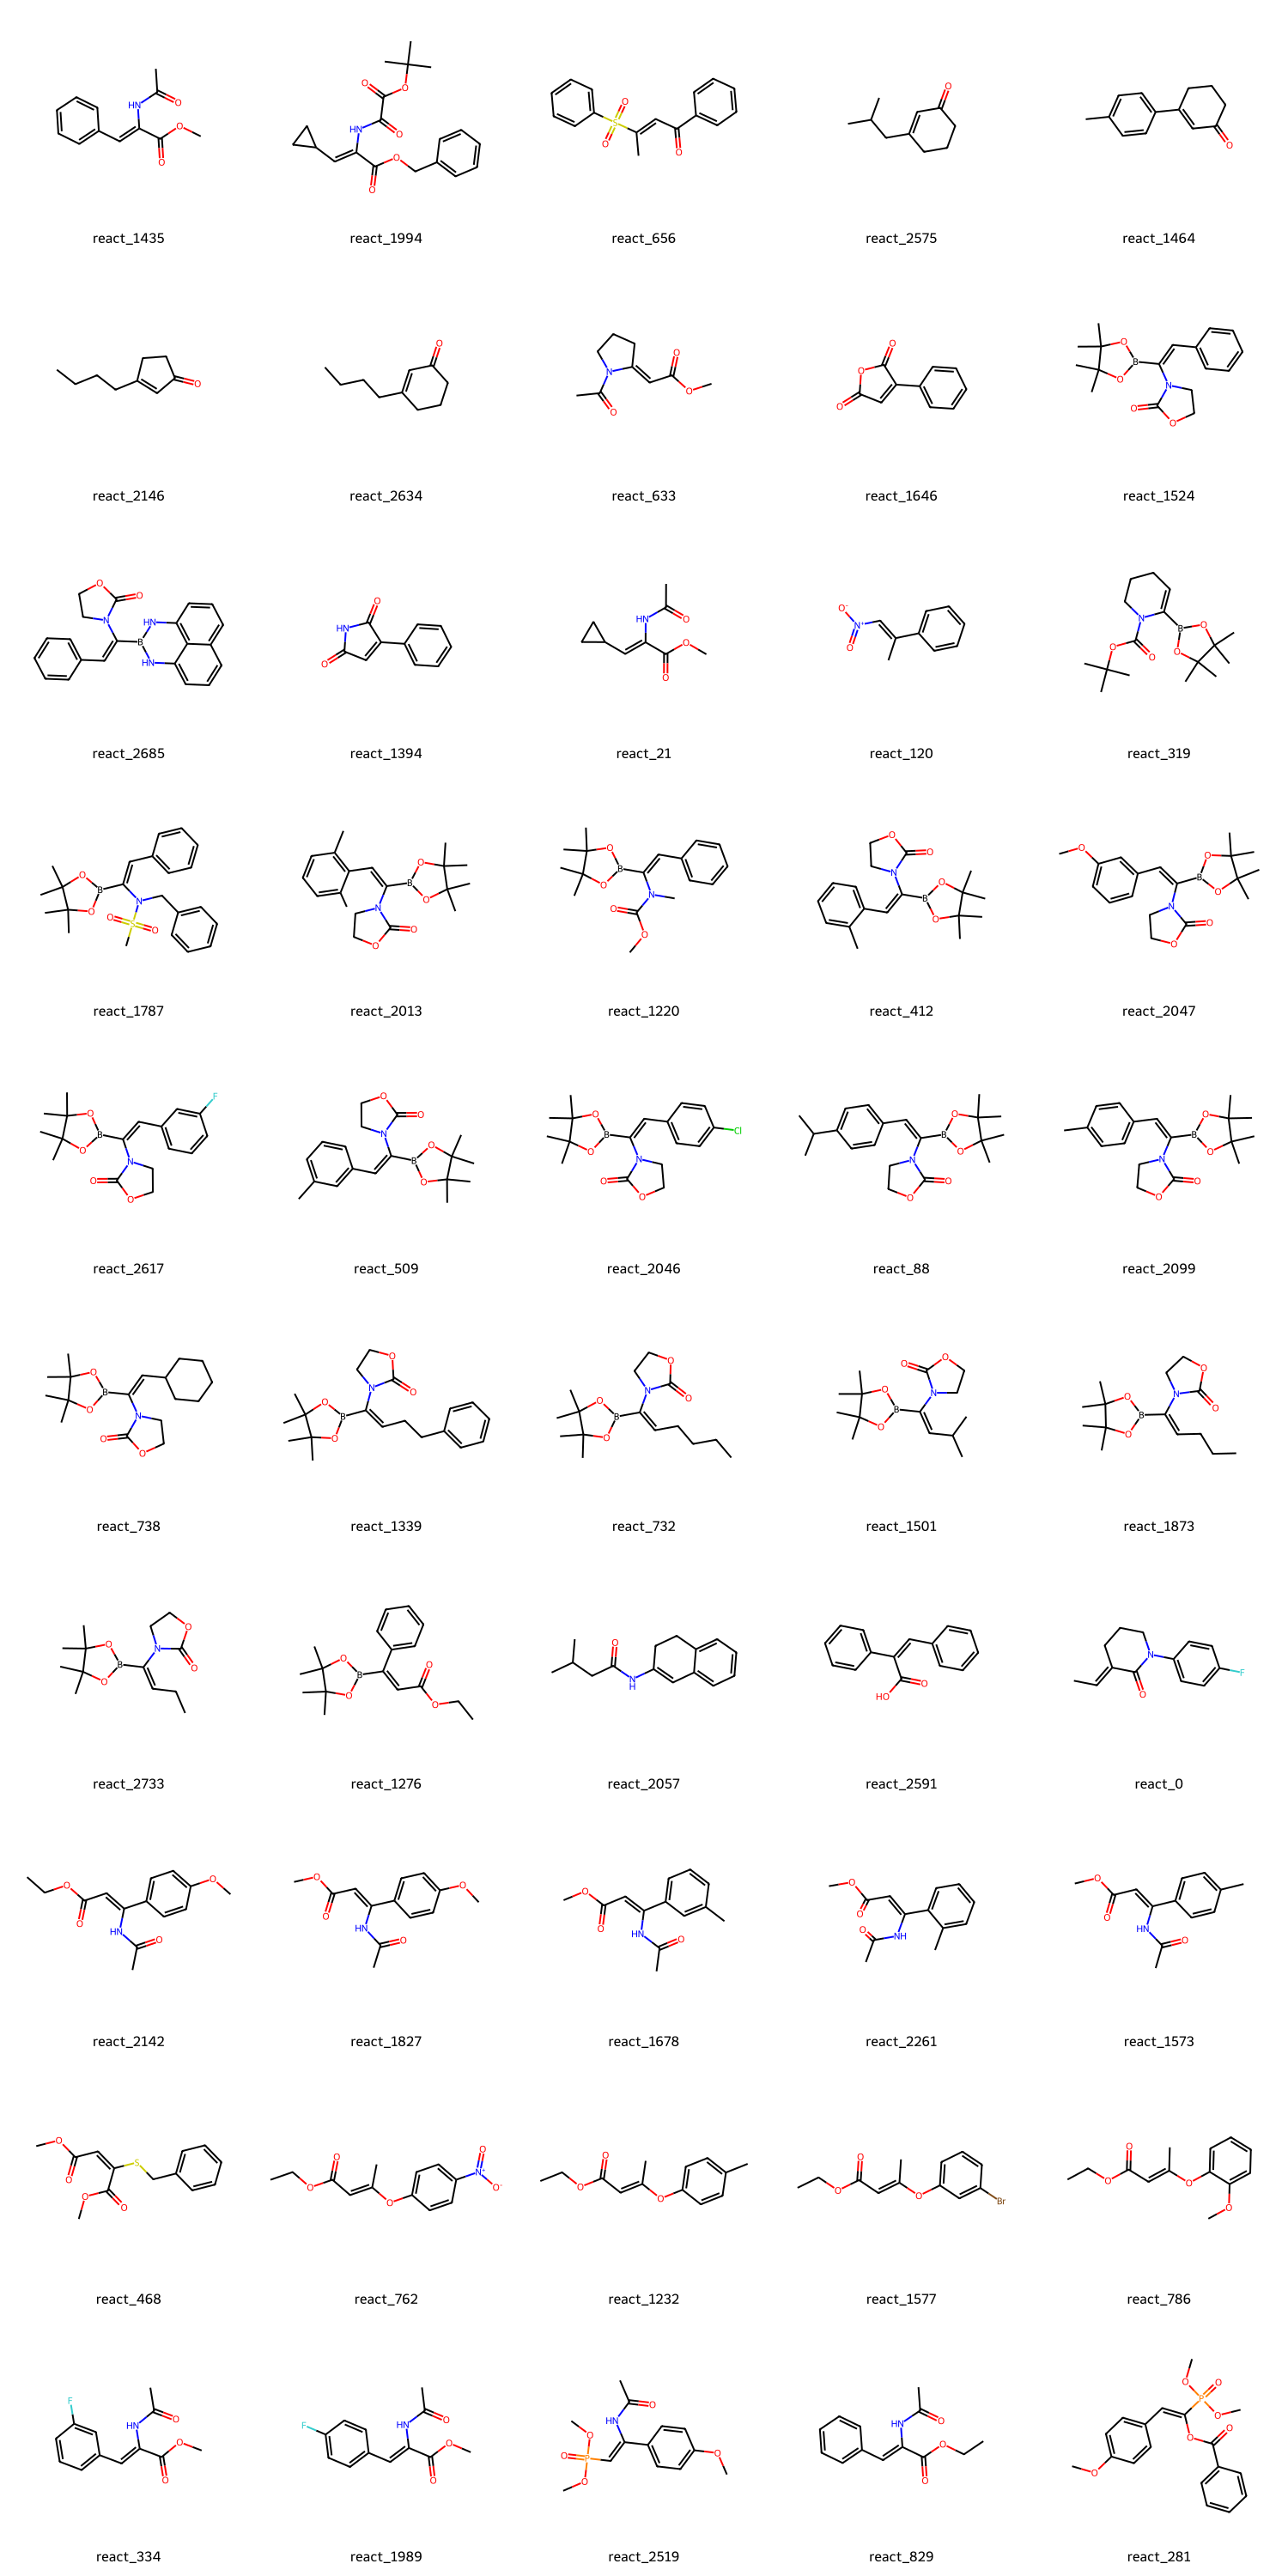

In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Load the two Excel files
file1 = 'reordered_final_merged_cleaned_qqm_molecule_charges.xlsx'  # First file
file2 = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/alkene/fixed_react_map_aho_dataset.xlsx'  # Second file

df1 = pd.read_excel(file1)  # Load the first file (containing Tri_Q2 data)
df2 = pd.read_excel(file2)  # Load the second file (containing Reactant ID and SMILES)

# Step 1: Filter for the Tri_Q2 subset in the first file
tri_q2_df = df1[df1['_Alkene_Type'] == 'Tri_Q2']

# Step 2: Match the Reactant IDs from Tri_Q2 subset to the Reactant ID in the second file
# Using a merge to match the Reactant ID
merged_df = pd.merge(tri_q2_df, df2[['Reactant ID', 'Reactant SMILES']], on='Reactant ID', how='inner')

# Step 3: Extract unique SMILES strings corresponding to the matched Reactant IDs
unique_smiles_df = merged_df[['Reactant ID', 'Reactant SMILES']].drop_duplicates(subset='Reactant SMILES')

# Step 4: Convert SMILES strings to RDKit Mol objects, filtering out any invalid ones
mols = []
valid_legends = []
for index, row in unique_smiles_df.iterrows():
    mol = Chem.MolFromSmiles(row['Reactant SMILES'])
    if mol is not None:  # Only add if the SMILES is valid
        mols.append(mol)
        valid_legends.append(row['Reactant ID'])

# Step 5: Visualize the molecules in a grid
if mols:  # Ensure there are molecules to display
    img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(300, 300), legends=valid_legends)
    display(img)
else:
    print("No valid molecules to display.")
